In [2]:
from nltk import pos_tag
from sklearn.pipeline import Pipeline
from sklearn.decomposition import LatentDirichletAllocation

import warnings
warnings.filterwarnings('ignore')

from data_access.twitter_reader import TwitterReader
from data_storage.db_manager import DBManager
from data_wrangling.wrangler import Wrangler
from data_transformers.normalizers import TextNormalizer 
from data_transformers.vectorizer import OneHotVectorizer
from data_transformers.extractors import text_from_cluster, ids_from_cluster
from models.models import get_relevant_topic, Cluster
from visuals.plots import wordcloud, frequency_distribution, t_sne, t_sne_clustered
from sklearn.metrics import accuracy_score

from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer

from IPython.display import set_matplotlib_formats
import matplotlib.pyplot as plt
set_matplotlib_formats('svg')

In [ ]:
# db_manager = DBManager()
# db_manager.reset_raw_tweets()
# db_manager.reset_processed_tweets()

In [3]:
db_manager = DBManager()

# q_dict = {'#': ['NYC', 'Happy'], 'keyword': ['cold', 'winter']}
# tr = TwitterReader('./local_configs/api_keys.json')
# tr.set_query(q_dict)
# result = tr.read(pages=1)
# db_manager.save_tweets(result)

In [ ]:
import json
with open('deleteme.json', 'r', encoding='utf-8') as f:
    result = json.load(f)

In [ ]:
wr = Wrangler(db_manager.get_tweet_texts())


In [ ]:
wt = wr.tokenize()

In [ ]:
db_manager.save_processed_tweets(wt)

In [ ]:
tt = db_manager.get_tweet_texts()

In [4]:
processed_tweets = db_manager.get_processed_tweets()

tn = TextNormalizer()
transformed_text = tn.transform(processed_tweets)

In [ ]:
vis = frequency_distribution(transformed_text)
# plt.savefig('frequency_distribution.svg')

In [ ]:
wordcloud(transformed_text)
# plt.savefig('word_cloud.svg')

In [ ]:
t_sne(transformed_text)

In [39]:
c = Cluster(3)
ct = c.clustered_text(transformed_text)

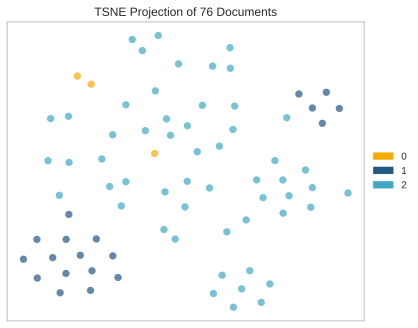

In [40]:
t_sne_clustered(ct)


In [42]:
cluster_one = text_from_cluster(ct, 1)
get_relevant_topic(cluster_one)

['early', 'clear', 'brisk', 'evening', 'rain']

In [43]:
ids = ids_from_cluster(ct, 1)

In [44]:
list(db_manager.get_tweet_urls(tweet_ids=ids))

[('Rain and wet snow move out of the area early this evening, then clearing, brisk and cold as lows dip to 31 in #nyc.  After a cold, quiet day tomorrow, all indicators point to a major winter storm late Wednesday into Thursday morning with possible blizzard-like conditions. #abc7ny ',
  ['https://t.co/m7RsVuZimg'])]